<a href="https://colab.research.google.com/github/kartikeyahl/MS_analysis/blob/main/ms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importing the dataset
dataset = pd.read_csv('MS admits and reject2.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values

In [ ]:
dataset=dataset.drop(['Course'], axis='columns')
dataset.head()

,University,CGPA,TOEFL,GRE,Work Experience,Research Paper,Admit
0,University of Texas Austin,8.4,NaN,320.0,1.0,0.0,1
1,University of Texas Austin,9.3,94.0,NaN,1.0,0.0,1
2,University of Texas Austin,7.5,100.0,330.0,1.0,0.0,1
3,University of Texas Austin,8.9,114.0,325.0,0.0,0.0,1
4,University of Texas Austin,9.6,115.0,332.0,0.0,0.0,1


In [ ]:
datagrp_uni=dataset.groupby("University")
datagrp_work=dataset.groupby("Work Experience")
datagrp_research=dataset.groupby("Research Paper")

In [ ]:
datagrp_uni_admit=dataset.groupby(["University","Admit"])
datagrp_uni_admit_work=dataset.groupby(["University","Admit","Work Experience"])

In [ ]:
# dataGetU1= datagrp_uni.get_group("University of Texas Austin")
# dataGetU2= datagrp_uni.get_group("University of Texas Dallas")
# dataGetU3= datagrp_uni.get_group("University of Southern California")
# dataGetU4= datagrp_uni.get_group("Northwestern university")
# dataGetU5= datagrp_uni.get_group("University of Pennsylvania")

KeyboardInterrupt: ignored

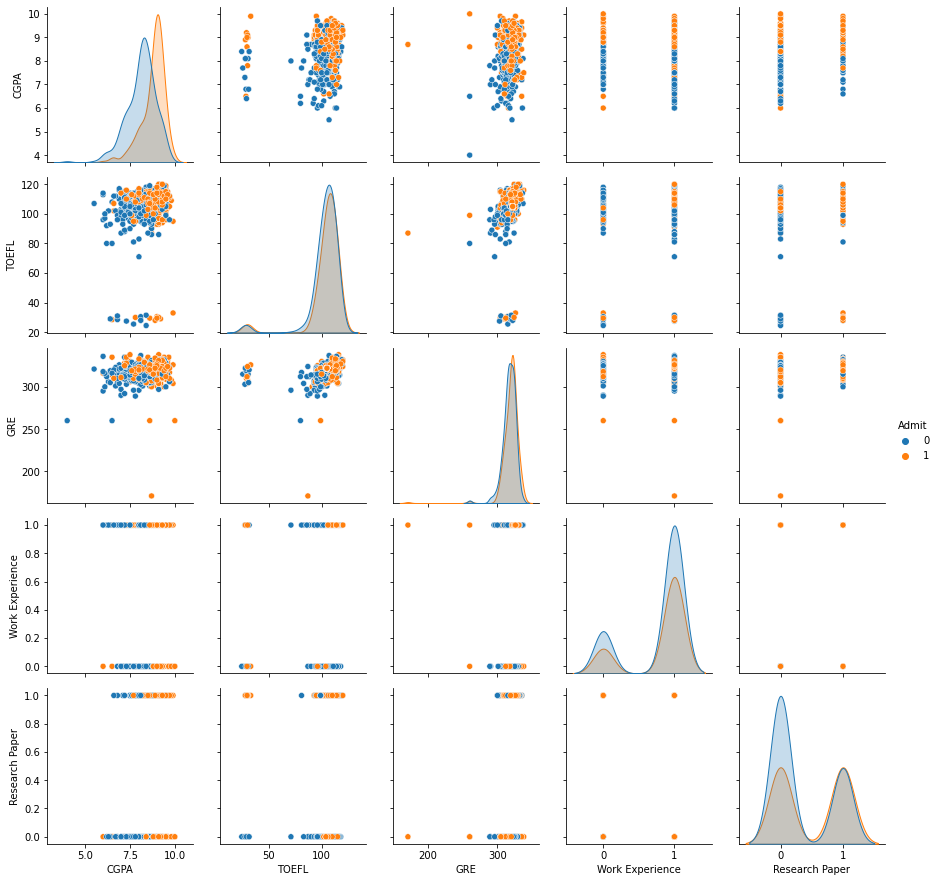

In [ ]:
sns.pairplot(dataset, hue='Admit')

In [ ]:
sns.pairplot(dataset, hue='Admit', vars=['Work Experience', 'Research Paper']);
sns.pairplot(dataset, hue='Admit', vars=['TOEFL', 'GRE']);
sns.pairplot(dataset, hue='Admit', vars=['CGPA', 'Research Paper']);


In [ ]:
dataset["University"]=dataset["University"].astype("category")

In [ ]:
#replace NaN with 0
dataset['Work Experience'] = dataset['Work Experience'].fillna(0)
dataset['Research Paper'] = dataset['Research Paper'].fillna(0)

In [ ]:
dataset.info()

In [ ]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataset.iloc[:, 1:4])
dataset.iloc[:, 1:4] = imputer.transform(dataset.iloc[:, 1:4])

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
def researchpaper_who_got_admit(df):
  if df["Admit"]==1:
    if df["Research Paper"]==1:
      return "got research paper"
    else:
      return "no research paper"
  else:
    pass

def researchpaper_who_did_not_got_admit(df):
  if df["Admit"]==0:
    if df["Research Paper"]==1:
      return "got research paper"
    else:
      return "no research paper"
  else:
    pass

def researchpaper_who_got_work_exp(df):
  if df["Work Experience"]==1:
    if df["Research Paper"]==1:
      return "got research paper"
    else:
      return "no research paper"
  else:
    pass

def researchpaper_who_did_not_got_work_exp(df):
  if df["Work Experience"]==0:
    if df["Research Paper"]==1:
      return "got research paper"
    else:
      return "no research paper"
  else:
    pass

def work_exp_who_got_admit(df):
  if df["Admit"]==1:
    if df["Work Experience"]==1:
      return "got work_exp"
    else:
      return "no work_exp"
  else:
    pass

def work_exp_who_did_not_got_admit(df):
  if df["Admit"]==0:
    if df["Work Experience"]==1:
      return "got work_exp "
    else:
      return "no work_exp"
  else:
    pass

In [ ]:
plt.style.use("seaborn-dark")
plt.title("% of candidates with or without research paper who got admit")
dataset.apply(researchpaper_who_got_admit, axis=1).value_counts().plot(kind = "pie", startangle=90, autopct='%1.1f%%', label="")


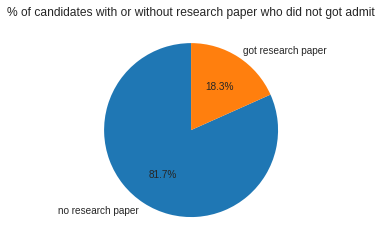

In [ ]:
plt.title("% of candidates with or without research paper who did not got admit")
dataset.apply(researchpaper_who_did_not_got_admit, axis=1).value_counts().plot(kind = "pie", startangle=90, autopct='%1.1f%%', label="")

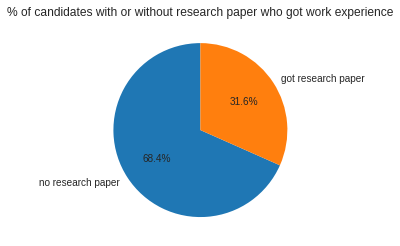

In [ ]:
plt.title("% of candidates with or without research paper who got work experience")
dataset.apply(researchpaper_who_got_work_exp, axis=1).value_counts().plot(kind = "pie", startangle=90, autopct='%1.1f%%', label="")

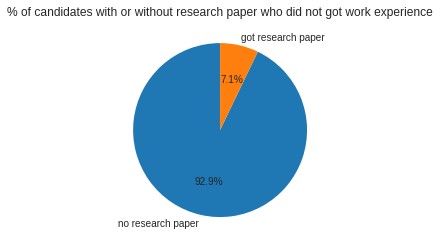

In [ ]:
plt.title("% of candidates with or without research paper who did not got work experience")
dataset.apply(researchpaper_who_did_not_got_work_exp, axis=1).value_counts().plot(kind = "pie", startangle=90, autopct='%1.1f%%', label="")

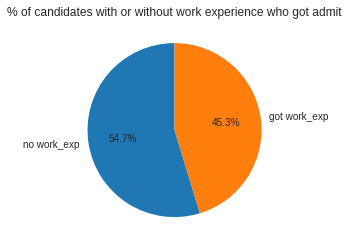

In [ ]:
plt.title("% of candidates with or without work experience who got admit")
dataset.apply(work_exp_who_got_admit, axis=1).value_counts().plot(kind = "pie", startangle=90, autopct='%1.1f%%', label="")

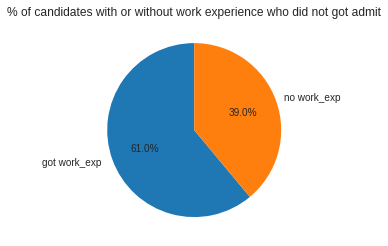

In [ ]:
plt.title("% of candidates with or without work experience who did not got admit")
dataset.apply(work_exp_who_did_not_got_admit, axis=1).value_counts().plot(kind = "pie", startangle=90, autopct='%1.1f%%', label="")

In [ ]:
dgrp_UT_AUSTIN=datagrp_uni.get_group("University of Texas Austin")

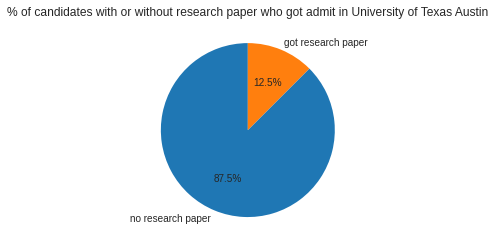

In [ ]:
plt.title("% of candidates with or without research paper who got admit in University of Texas Austin")
dgrp_UT_AUSTIN.apply(researchpaper_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

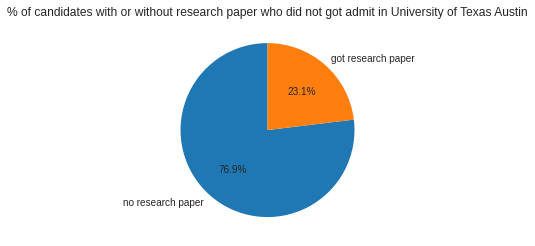

In [ ]:
plt.title("% of candidates with or without research paper who did not got admit in University of Texas Austin")
dgrp_UT_AUSTIN.apply(researchpaper_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

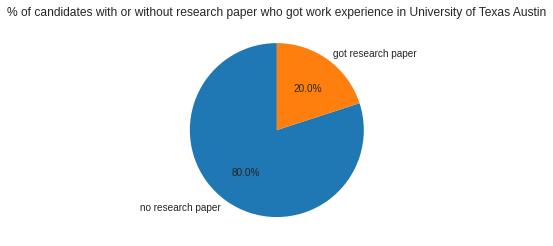

In [ ]:
plt.title("% of candidates with or without research paper who got work experience in University of Texas Austin")
dgrp_UT_AUSTIN.apply(researchpaper_who_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

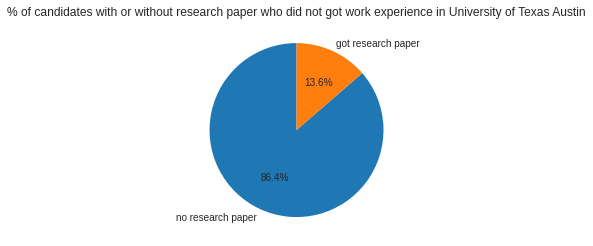

In [ ]:
plt.title("% of candidates with or without research paper who did not got work experience in University of Texas Austin")
dgrp_UT_AUSTIN.apply(researchpaper_who_did_not_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

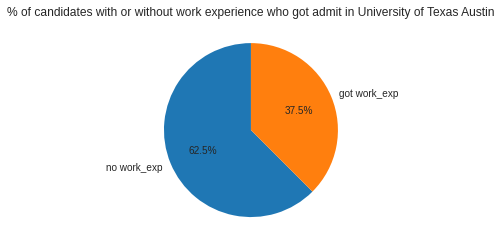

In [ ]:
plt.title("% of candidates with or without work experience who got admit in University of Texas Austin")
dgrp_UT_AUSTIN.apply(work_exp_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

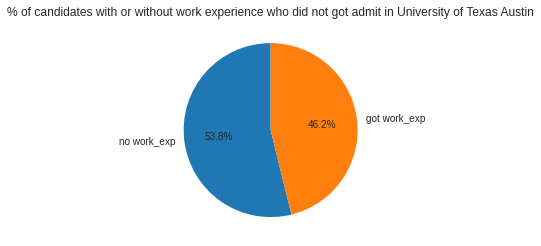

In [ ]:
plt.title("% of candidates with or without work experience who did not got admit in University of Texas Austin")
dgrp_UT_AUSTIN.apply(work_exp_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

In [ ]:
dgrp_UT_DALLAS=datagrp_uni.get_group("University of Texas Dallas")

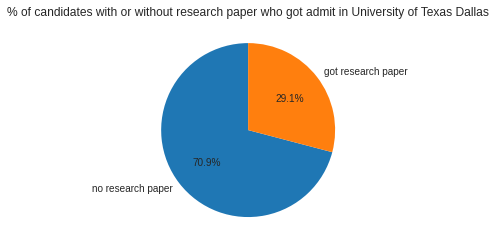

In [ ]:
plt.title("% of candidates with or without research paper who got admit in University of Texas Dallas")
dgrp_UT_DALLAS.apply(researchpaper_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

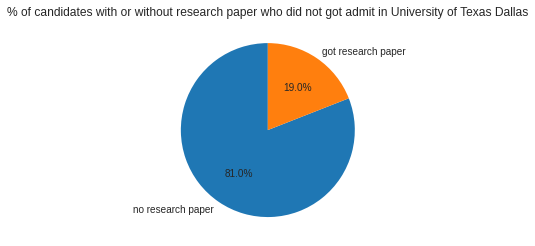

In [ ]:
plt.title("% of candidates with or without research paper who did not got admit in University of Texas Dallas")
dgrp_UT_DALLAS.apply(researchpaper_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

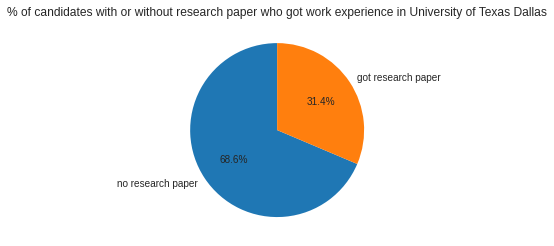

In [ ]:
plt.title("% of candidates with or without research paper who got work experience in University of Texas Dallas")
dgrp_UT_DALLAS.apply(researchpaper_who_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

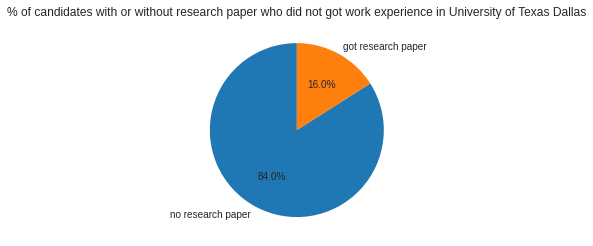

In [ ]:
plt.title("% of candidates with or without research paper who did not got work experience in University of Texas Dallas")
dgrp_UT_DALLAS.apply(researchpaper_who_did_not_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

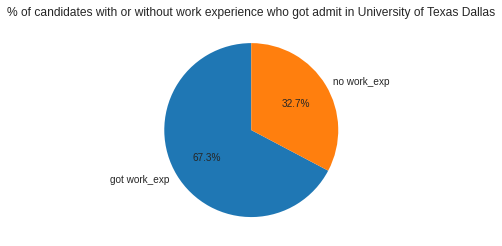

In [ ]:
plt.title("% of candidates with or without work experience who got admit in University of Texas Dallas")
dgrp_UT_DALLAS.apply(work_exp_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

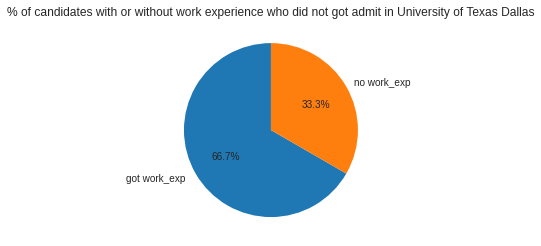

In [ ]:
plt.title("% of candidates with or without work experience who did not got admit in University of Texas Dallas")
dgrp_UT_DALLAS.apply(work_exp_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

In [ ]:
dgrp_Northwestern=datagrp_uni.get_group("Northwestern university")

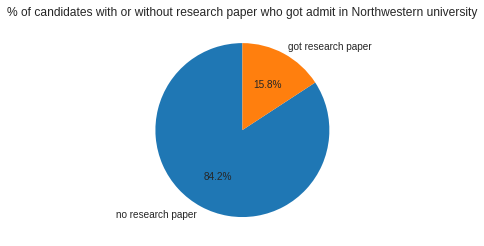

In [ ]:
plt.title("% of candidates with or without research paper who got admit in Northwestern university")
dgrp_Northwestern.apply(researchpaper_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

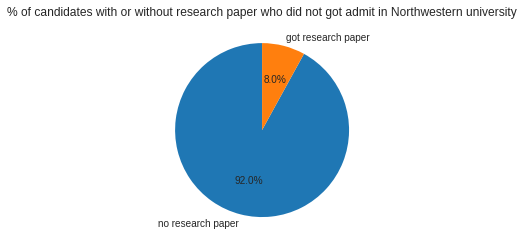

In [ ]:
plt.title("% of candidates with or without research paper who did not got admit in Northwestern university")
dgrp_Northwestern.apply(researchpaper_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

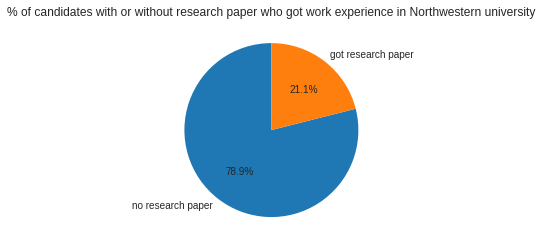

In [ ]:
plt.title("% of candidates with or without research paper who got work experience in Northwestern university")
dgrp_Northwestern.apply(researchpaper_who_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

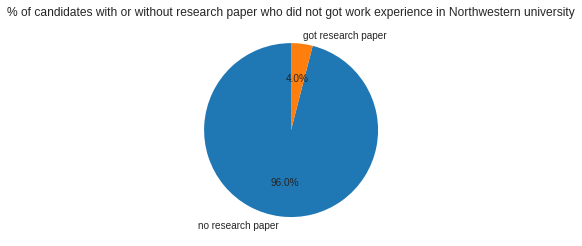

In [ ]:
plt.title("% of candidates with or without research paper who did not got work experience in Northwestern university")
dgrp_Northwestern.apply(researchpaper_who_did_not_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

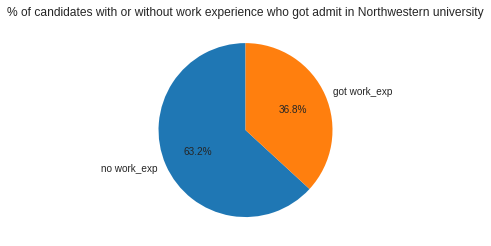

In [ ]:
plt.title("% of candidates with or without work experience who got admit in Northwestern university")
dgrp_Northwestern.apply(work_exp_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

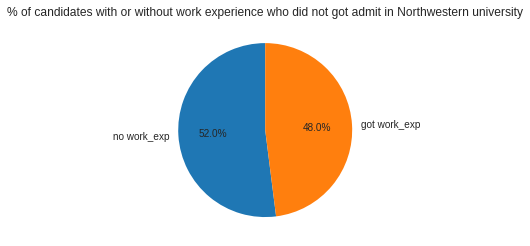

In [ ]:
plt.title("% of candidates with or without work experience who did not got admit in Northwestern university")
dgrp_Northwestern.apply(work_exp_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

In [ ]:
dgrp_Souther_Cal=datagrp_uni.get_group("University of Southern California")

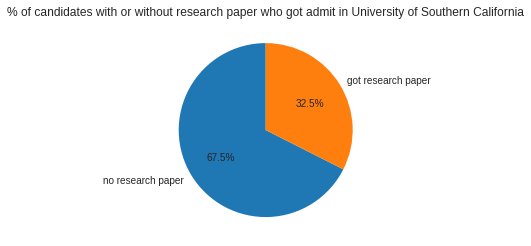

In [ ]:
plt.title("% of candidates with or without research paper who got admit in University of Southern California")
dgrp_Souther_Cal.apply(researchpaper_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

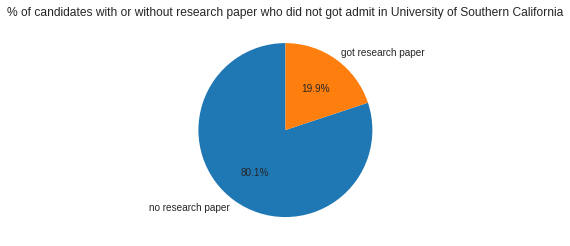

In [ ]:
plt.title("% of candidates with or without research paper who did not got admit in University of Southern California")
dgrp_Souther_Cal.apply(researchpaper_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

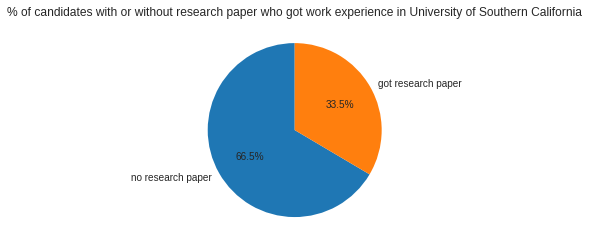

In [ ]:
plt.title("% of candidates with or without research paper who got work experience in University of Southern California")
dgrp_Souther_Cal.apply(researchpaper_who_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

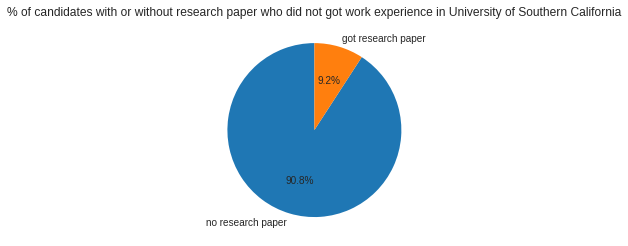

In [ ]:
plt.title("% of candidates with or without research paper who did not got work experience in University of Southern California")
dgrp_Souther_Cal.apply(researchpaper_who_did_not_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

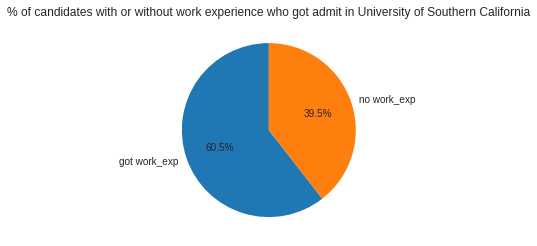

In [ ]:
plt.title("% of candidates with or without work experience who got admit in University of Southern California")
dgrp_Souther_Cal.apply(work_exp_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

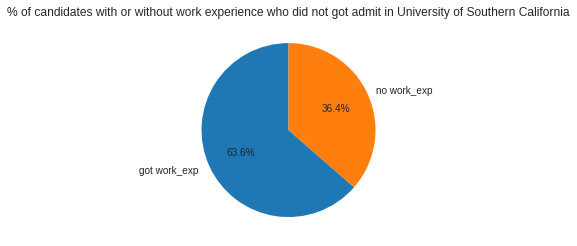

In [ ]:
plt.title("% of candidates with or without work experience who did not got admit in University of Southern California")
dgrp_Souther_Cal.apply(work_exp_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

In [ ]:
dgrp_pennsylvania=datagrp_uni.get_group("University of Pennsylvania")

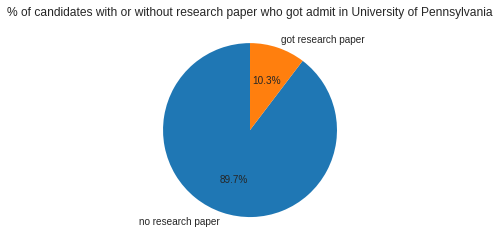

In [ ]:
plt.title("% of candidates with or without research paper who got admit in University of Pennsylvania")
dgrp_pennsylvania.apply(researchpaper_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

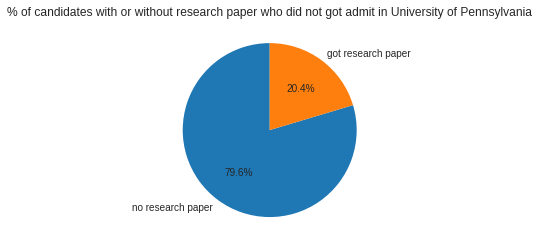

In [ ]:
plt.title("% of candidates with or without research paper who did not got admit in University of Pennsylvania")
dgrp_pennsylvania.apply(researchpaper_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

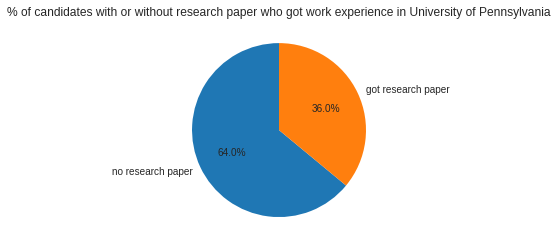

In [ ]:
plt.title("% of candidates with or without research paper who got work experience in University of Pennsylvania")
dgrp_pennsylvania.apply(researchpaper_who_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

In [ ]:
plt.title("% of candidates with or without research paper who did not got work experience in University of Pennsylvania")
dgrp_pennsylvania.apply(researchpaper_who_did_not_got_work_exp, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

In [ ]:
plt.title("% of candidates with or without work experience who got admit in University of Pennsylvania")
dgrp_pennsylvania.apply(work_exp_who_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

In [ ]:
plt.title("% of candidates with or without work experience who did not got admit in University of Pennsylvania")
dgrp_pennsylvania.apply(work_exp_who_did_not_got_admit, axis=1).value_counts().plot(label="", kind = "pie", startangle=90, autopct='%1.1f%%')

In [ ]:
dataset.corr(method ='pearson')

In [ ]:
dataset.corr(method ='kendall')

In [ ]:
dummies = pd.get_dummies(dataset.University)
dummies


In [ ]:
merged = pd.concat([dataset,dummies],axis='columns')
merged

In [68]:
dataset = merged.drop(['University of Texas Austin'], axis='columns')
dataset

,University,CGPA,TOEFL,GRE,Work Experience,Research Paper,Admit,Northwestern university,University of Pennsylvania,University of Southern California,University of Texas Dallas
0,University of Texas Austin,8.400000,103.428685,320.000000,1.0,0.0,1,0,0,0,0
1,University of Texas Austin,9.300000,94.000000,317.943639,1.0,0.0,1,0,0,0,0
2,University of Texas Austin,7.500000,100.000000,330.000000,1.0,0.0,1,0,0,0,0
3,University of Texas Austin,8.900000,114.000000,325.000000,0.0,0.0,1,0,0,0,0
4,University of Texas Austin,9.600000,115.000000,332.000000,0.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
657,University of Pennsylvania,8.423157,105.000000,322.000000,0.0,0.0,1,0,1,0,0
658,University of Pennsylvania,8.423157,105.000000,322.000000,0.0,0.0,1,0,1,0,0
659,University of Pennsylvania,8.423157,105.000000,322.000000,0.0,0.0,1,0,1,0,0
660,University of Pennsylvania,8.423157,105.000000,322.000000,0.0,0.0,1,0,1,0,0


In [69]:
cols = dataset.columns.tolist()
cols

['University',
 'CGPA',
 'TOEFL',
 'GRE',
 'Work Experience',
 'Research Paper',
 'Admit',
 'Northwestern university',
 'University of Pennsylvania',
 'University of Southern California',
 'University of Texas Dallas']

In [70]:
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
cols

['Northwestern university',
 'University of Pennsylvania',
 'University of Southern California',
 'University of Texas Dallas',
 'University',
 'CGPA',
 'TOEFL',
 'GRE',
 'Work Experience',
 'Research Paper',
 'Admit']

In [71]:
dataset = dataset[cols]
dataset

,Northwestern university,University of Pennsylvania,University of Southern California,University of Texas Dallas,University,CGPA,TOEFL,GRE,Work Experience,Research Paper,Admit
0,0,0,0,0,University of Texas Austin,8.400000,103.428685,320.000000,1.0,0.0,1
1,0,0,0,0,University of Texas Austin,9.300000,94.000000,317.943639,1.0,0.0,1
2,0,0,0,0,University of Texas Austin,7.500000,100.000000,330.000000,1.0,0.0,1
3,0,0,0,0,University of Texas Austin,8.900000,114.000000,325.000000,0.0,0.0,1
4,0,0,0,0,University of Texas Austin,9.600000,115.000000,332.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
657,0,1,0,0,University of Pennsylvania,8.423157,105.000000,322.000000,0.0,0.0,1
658,0,1,0,0,University of Pennsylvania,8.423157,105.000000,322.000000,0.0,0.0,1
659,0,1,0,0,University of Pennsylvania,8.423157,105.000000,322.000000,0.0,0.0,1
660,0,1,0,0,University of Pennsylvania,8.423157,105.000000,322.000000,0.0,0.0,1


In [72]:
dataset = dataset.drop(['University'], axis='columns')
dataset

,Northwestern university,University of Pennsylvania,University of Southern California,University of Texas Dallas,CGPA,TOEFL,GRE,Work Experience,Research Paper,Admit
0,0,0,0,0,8.400000,103.428685,320.000000,1.0,0.0,1
1,0,0,0,0,9.300000,94.000000,317.943639,1.0,0.0,1
2,0,0,0,0,7.500000,100.000000,330.000000,1.0,0.0,1
3,0,0,0,0,8.900000,114.000000,325.000000,0.0,0.0,1
4,0,0,0,0,9.600000,115.000000,332.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
657,0,1,0,0,8.423157,105.000000,322.000000,0.0,0.0,1
658,0,1,0,0,8.423157,105.000000,322.000000,0.0,0.0,1
659,0,1,0,0,8.423157,105.000000,322.000000,0.0,0.0,1
660,0,1,0,0,8.423157,105.000000,322.000000,0.0,0.0,1


In [73]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

No need to # Taking care of missing data as no null values are present.

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [75]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# dataset = np.array(columnTransformer.fit_transform(dataset))

In [76]:
X2 = dataset.drop(['Admit','Northwestern university','University of Pennsylvania','University of Southern California','University of Texas Dallas'], axis = 1)
dd=pd.DataFrame(X)


In [77]:
X3 =dataset.drop('Admit', axis=1)

In [78]:
X2

,CGPA,TOEFL,GRE,Work Experience,Research Paper
0,8.400000,103.428685,320.000000,1.0,0.0
1,9.300000,94.000000,317.943639,1.0,0.0
2,7.500000,100.000000,330.000000,1.0,0.0
3,8.900000,114.000000,325.000000,0.0,0.0
4,9.600000,115.000000,332.000000,0.0,0.0
...,...,...,...,...,...
657,8.423157,105.000000,322.000000,0.0,0.0
658,8.423157,105.000000,322.000000,0.0,0.0
659,8.423157,105.000000,322.000000,0.0,0.0
660,8.423157,105.000000,322.000000,0.0,0.0


[0.02014585 0.02856241 0.05050579 0.028359   0.38375886 0.21274157
 0.20706937 0.04735453 0.02150262]


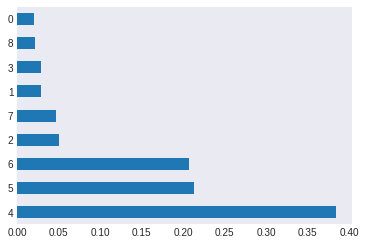

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dd.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [80]:
# Computing the importance of each feature
feature_importance = model.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        model.estimators_],
                                        axis = 0)

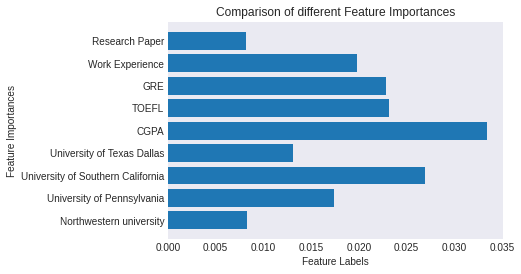

In [81]:
# Plotting a Bar Graph to compare the models
plt.barh(X3.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

1. GRE, TOEFL AND CGPA of candidates with or without work exp. and research paper.
2. GRE - TOEFL correlation
3. GRE - CGPA correlation
4. TOEFL - CGPA correlation
5. WORK EXP. - RESEARCH PAPER correlation
6. Each column correlation with admit.
7. % having research paper and work exp. who got admitted. 
8. Mean of toefl, cgpa and gre as per university.
9. Groupby on work exp. and research paper and university.

In [82]:
datagrp_uni.agg(["mean","min","max"])

CGPA              ...     Admit        
                                       mean  min    max  ...      mean min max
University                                               ...                  
Northwestern university            8.168971  6.0   9.70  ...  0.431818   0   1
University of Pennsylvania         8.577379  4.0   9.70  ...  0.617021   0   1
University of Southern California  8.445000  6.0   9.80  ...  0.356250   0   1
University of Texas Austin         8.525676  6.0   9.66  ...  0.648649   0   1
University of Texas Dallas         8.289474  6.2  10.00  ...  0.723684   0   1

[5 rows x 18 columns]

In [83]:
datagrp_work.agg(["mean","min","max"])

CGPA                  TOEFL  ... Research Paper     Admit        
                     mean  min   max        mean  ...            max      mean min max
Work Experience                                   ...                                 
0.0              8.410812  4.0  10.0  104.171852  ...            1.0  0.564935   0   1
1.0              8.433898  6.0   9.9  102.782087  ...            1.0  0.406780   0   1

[2 rows x 15 columns]

In [84]:
datagrp_research.agg(["mean","min","max"])

CGPA                  TOEFL  ... Work Experience     Admit        
                    mean  min   max        mean  ...             max      mean min max
Research Paper                                   ...                                  
0.0             8.370398  4.0  10.0  104.061287  ...             1.0  0.467803   0   1
1.0             8.631045  6.6   9.9  100.936041  ...             1.0  0.529851   0   1

[2 rows x 15 columns]

In [85]:
datagrp_uni_admit.agg(["mean","min","max","count"])

CGPA              ... Research Paper           
                                             mean  min    max  ...            min  max count
University                        Admit                        ...                          
Northwestern university           0      7.944463  6.0   9.70  ...            0.0  1.0    50
                                  1      8.464377  6.6   9.70  ...            0.0  1.0    38
University of Pennsylvania        0      8.455556  4.0   9.70  ...            0.0  1.0    54
                                  1      8.652994  7.2   9.70  ...            0.0  1.0    87
University of Southern California 0      8.126699  6.0   9.50  ...            0.0  1.0   206
                                  1      9.020175  7.7   9.80  ...            0.0  1.0   114
University of Texas Austin        0      8.292308  7.2   9.30  ...            0.0  1.0    13
                                  1      8.652083  6.0   9.66  ...            0.0  1.0    24
University of Texas Dallas        0      7.561905  6.2   9.00  ...            0.0  1.0    21
                                  1      8.567273  6.5  10.00  ...            0.0  1.0    55

[10 rows x 20 columns]

In [86]:
datagrp_uni_admit_work.agg(["mean","min","max","count"])

CGPA  ... Research Paper
                                                             mean  ...          count
University                        Admit Work Experience            ...               
Northwestern university           0     0.0              7.866275  ...             26
                                        1.0              8.029167  ...             24
                                  1     0.0              8.472763  ...             24
                                        1.0              8.450000  ...             14
University of Pennsylvania        0     0.0              8.321053  ...             19
                                        1.0              8.528571  ...             35
                                  1     0.0              8.550146  ...             72
                                        1.0              9.146667  ...             15
University of Southern California 0     0.0              8.002667  ...             75
                                        1.0              8.197710  ...            131
                                  1     0.0              9.057778  ...             45
                                        1.0              8.995652  ...             69
University of Texas Austin        0     0.0              8.385714  ...              7
                                        1.0              8.183333  ...              6
                                  1     0.0              8.623333  ...             15
                                        1.0              8.700000  ...              9
University of Texas Dallas        0     0.0              7.771429  ...              7
                                        1.0              7.457143  ...             14
                                  1     0.0              8.816667  ...             18
                                        1.0              8.445946  ...             37

[20 rows x 16 columns]

# **Training for UT Austin**

In [87]:
X_UT_AUSTIN = dgrp_UT_AUSTIN.iloc[:, 1:-1].values
y_UT_AUSTIN = dgrp_UT_AUSTIN.iloc[:, -1].values

In [88]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_UT_AUSTIN_train, X_UT_AUSTIN_test, y_UT_AUSTIN_train, y_UT_AUSTIN_test = train_test_split(X_UT_AUSTIN, y_UT_AUSTIN, test_size = 0.2, random_state = 1)

In [89]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_UT_AUSTIN_train = sc.fit_transform(X_UT_AUSTIN_train)
X_UT_AUSTIN_test = sc.transform(X_UT_AUSTIN_test)

***Logistic Regression***

In [90]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_UT_AUSTIN_train, y_UT_AUSTIN_train)

LogisticRegression(random_state=0)

In [91]:
# # Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [92]:
# Predicting the Test set results
y_UT_AUSTIN_pred = classifier.predict(X_UT_AUSTIN_test)
print(np.concatenate((y_UT_AUSTIN_pred.reshape(len(y_UT_AUSTIN_pred),1), y_UT_AUSTIN_test.reshape(len(y_UT_AUSTIN_test),1)),1))

[[1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]]


In [93]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)
print(cm)
accuracy_score(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)

[[1 3]
 [0 4]]


0.625

In [94]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_UT_AUSTIN_train, y = y_UT_AUSTIN_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 55.00 %
Standard Deviation: 21.15 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


***K-NN***

In [95]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_UT_AUSTIN_train, y_UT_AUSTIN_train)

KNeighborsClassifier()

In [96]:
# Predicting the Test set results
y_UT_AUSTIN_pred = classifier.predict(X_UT_AUSTIN_test)
print(np.concatenate((y_UT_AUSTIN_pred.reshape(len(y_UT_AUSTIN_pred),1), y_UT_AUSTIN_test.reshape(len(y_UT_AUSTIN_test),1)),1))

[[1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]]


In [97]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)
print(cm)
accuracy_score(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)

[[1 3]
 [0 4]]


0.625

In [98]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_UT_AUSTIN_train, y = y_UT_AUSTIN_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.00 %
Standard Deviation: 15.72 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


In [99]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'leaf_size': [ 10, 20, 30,40,50], 'n_neighbors': [5,10,15], 'p':[1,2,3,4]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 65.41 %
Best Parameters: {'leaf_size': 20, 'n_neighbors': 5, 'p': 1}


***SVM***

In [100]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_UT_AUSTIN_train, y_UT_AUSTIN_train)

SVC(kernel='linear', random_state=0)

In [101]:
# Predicting the Test set results
y_UT_AUSTIN_pred = classifier.predict(X_UT_AUSTIN_test)
print(np.concatenate((y_UT_AUSTIN_pred.reshape(len(y_UT_AUSTIN_pred),1), y_UT_AUSTIN_test.reshape(len(y_UT_AUSTIN_test),1)),1))

[[1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]]


In [102]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)
print(cm)
accuracy_score(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)

[[1 3]
 [0 4]]


0.625

In [103]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_UT_AUSTIN_train, y = y_UT_AUSTIN_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 56.67 %
Standard Deviation: 26.03 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


In [104]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10], 'kernel': ['linear']},
              {'C': [1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 74.88 %
Best Parameters: {'C': 1, 'kernel': 'linear'}


***Random Forest***

In [105]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_UT_AUSTIN_train, y_UT_AUSTIN_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [106]:
# Predicting the Test set results
y_UT_AUSTIN_pred = classifier.predict(X_UT_AUSTIN_test)
print(np.concatenate((y_UT_AUSTIN_pred.reshape(len(y_UT_AUSTIN_pred),1), y_UT_AUSTIN_test.reshape(len(y_UT_AUSTIN_test),1)),1))

[[1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]]


In [107]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)
print(cm)
accuracy_score(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)

[[1 3]
 [1 3]]


0.5

In [108]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_UT_AUSTIN_train, y = y_UT_AUSTIN_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


Accuracy: 55.00 %
Standard Deviation: 25.87 %


***XG BOOST***

In [109]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_UT_AUSTIN_train, y_UT_AUSTIN_train)

XGBClassifier()

In [110]:
# Predicting the Test set results
y_UT_AUSTIN_pred = classifier.predict(X_UT_AUSTIN_test)
print(np.concatenate((y_UT_AUSTIN_pred.reshape(len(y_UT_AUSTIN_pred),1), y_UT_AUSTIN_test.reshape(len(y_UT_AUSTIN_test),1)),1))

[[1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]]


In [111]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)
print(cm)
accuracy_score(y_UT_AUSTIN_test, y_UT_AUSTIN_pred)

[[1 3]
 [0 4]]


0.625

In [112]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_UT_AUSTIN_train, y = y_UT_AUSTIN_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 55.00 %
Standard Deviation: 15.00 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,
